In [1]:
import cryoenv.cryosig as cs
import numpy as np
import matplotlib.pyplot as plt
import pickle
from copy import deepcopy
from cryoenv.mqtt import double_tes, augment_pars

%config InlineBackend.figure_formats = ['svg']

In [2]:
names = ['li1p', 'li1l', 'li2p']

pars = {}

name = names[2]

buffer_size = 1400

add_pars = {
    'store_raw': True,
    'max_buffer_len': buffer_size,
    'tpa_queue': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'pileup_prob': 0.,
    'tp_interval': 10,
    'dac_range': (0., 10.) if name == 'li1l' else (0., 5.), 
    'Ib_range': (0.1, 3.) if name == 'li1l' else (0.5, 5.), 
    'adc_range': (-10., 10.),
    'Tb': lambda t: 15.,
            }

In [3]:
with open("saved_pars/{}_pars_cryoenv.pkl".format(name),"rb") as fh:
    pars[name] = pickle.load(fh)

In [4]:
pars_2tes = double_tes(pars[name])

In [5]:
pars_2tes_aug = augment_pars(pars_2tes, **add_pars)

In [6]:
# standard scenario
det = cs.DetectorModel(**pars_2tes_aug)

In [7]:
det.wait(5)

In [8]:
det.T

array([[19.84153254, 20.83489944, 20.27944409],
       [19.84153257, 20.83489948, 20.27944417],
       [19.8415326 , 20.83489952, 20.27944425],
       ...,
       [19.84183652, 20.83527649, 20.28023084],
       [19.84183653, 20.8352765 , 20.28023087],
       [19.84183654, 20.83527652, 20.28023089]])

In [9]:
det.dac

array([0.69369671, 0.72573895])

In [10]:
det.Ib

array([6.59304522, 5.84226563])

In [25]:
det.set_control(dac=[2.6, 1.7], Ib=[4, 4], norm=False)

det.wait(5)

det.trigger(er=np.array([0., 0., 5.95]), tpa=np.array([0.0, 0.0]))

det.ph

T0 is [28.5919178  28.93842882 27.61473845] mK.
Calculated in 1.577812910079956 s.
Generated noise in 0.0135650634765625 s.


array([0.11104878, 0.26903401])

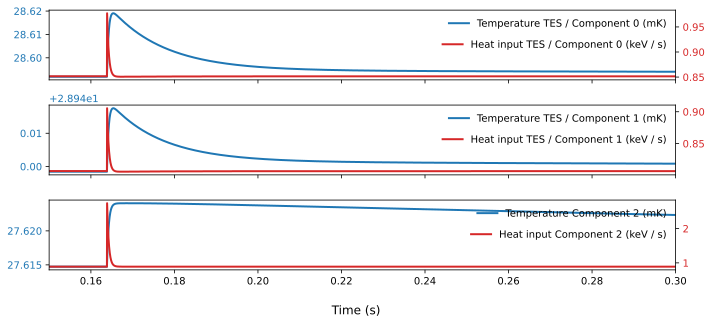

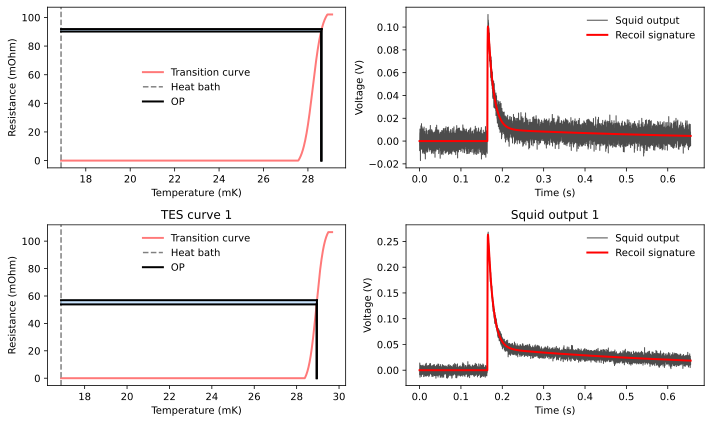

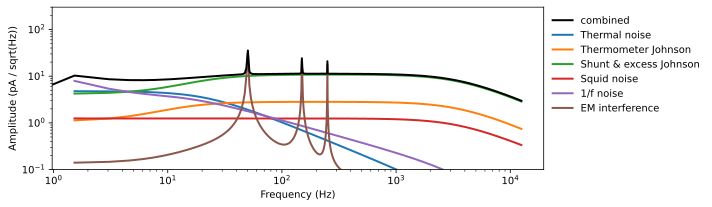

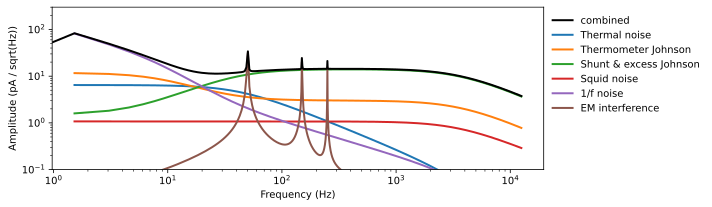

In [26]:
det.plot_temperatures(xlim=(0.15, 0.3), dpi=300)  # save_path='plots_paper/temperatures.png', 

fig, axes = det.plot_tes(save_path=None, show=False, dpi=300)  # 'plots_paper/tes.png'  xlim_temp=(29., 31.5), xlim_time=(0.15, 0.25), 
# axes[0].scatter(pars[name]['transition_curve'][:,0], 1e3*(pars[name]['transition_curve'][:,1] - 0.012)*110/(110-12), 
#                 rasterized=True, color='grey', s=10, label='measured')
# axes[1].plot(det.kwargs['sev'][:,0] + 0.0026 + 0.16384, det.kwargs['sev'][:,1]*0.37, linestyle='dashed', color='grey', linewidth=2, label='measured')
axes[0].set_title('')
axes[1].set_title('')
axes[0].legend(frameon=False)
axes[1].legend(frameon=False)
plt.tight_layout()
# plt.savefig('plots_paper/tes.png')
plt.show()

for i in range(det.nmbr_tes):
    det.plot_nps(tes_channel=i, only_sum=False, save_path=None, show=False, dpi=300)  # 'plots_paper/nps_tes_{}.png'.format(i)
    # plt.loglog(det.kwargs['nps'][:,0], np.sqrt(det.kwargs['nps'][:,1])*1e6, color='grey', linestyle='dashed', linewidth=2, label='measured', zorder=100)
    plt.legend(frameon=False, bbox_to_anchor=(1., 1.))
    plt.ylim(1e-1, 3e2)
    plt.title('')
    plt.tight_layout()
    # plt.savefig('plots_paper/nps_tes_{}.png'.format(i))
    plt.show()

In [27]:
det.print_noise_parameters()

Resistance TES / Resistance normal conducting: 0.8831886637590965
Temperature mixing chamber: 16.886450569861044 mK
Temperature TES: 28.591917795144767 mK
Resistance TES: 90.15696004198752 mOhm
Tau eff: 12.028255221934321 ms
TES Slope: 66.50265010220829 mOhm/mK
C: 1306.809192198202 fJ / K 
Geff: 108.64495041767557 pW / K
Tau in: 18.846530532463852 ms
Geb: 69.33950999347994 pW / K 
G ETF: 39.305440424195645 pW / K 
R shunt: 43.08698598432973 mOhm
Temperature shunt: 16.886450569861044 mK
i sq: 1.246042814154557 pA/sqrt(Hz)
1 / f amplitude (pW): 3.0118292481083053e-05 
1 / f power (flicker slope): 1.3643956296307262 
Tau el (s): 2.8617692323226057e-06 
Tau I (s): -0.031170254299634527 
L_I (): 1.6046319144943526 
